### 使用CNN做手写体数字识别

In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

In [2]:
print(tf.__version__)

2.2.0


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [0]:
import numpy as np
import matplotlib.pyplot as plt

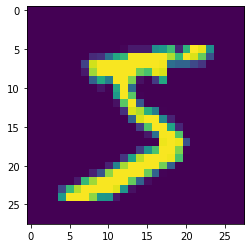

In [6]:
plt.imshow(x_train[0])

In [0]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [8]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


### 建立模型& 训练模型

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [12]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2379 - acc: 0.9273 - val_loss: 0.0568 - val_acc: 0.9827
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0866 - acc: 0.9740 - val_loss: 0.0381 - val_acc: 0.9864
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0637 - acc: 0.9808 - val_loss: 0.0364 - val_acc: 0.9875
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0524 - acc: 0.9836 - val_loss: 0.0286 - val_acc: 0.9906
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0442 - acc: 0.9863 - val_loss: 0.0291 - val_acc: 0.9917
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0390 - acc: 0.9880 - val_loss: 0.0293 - val_acc: 0.9904
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0342 - acc: 0.9894 - val_loss: 0.0315 - val_acc: 0.9901
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.

In [13]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0275 - acc: 0.9926


[0.027529461309313774, 0.9926000237464905]

In [0]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['acc'])
  plt.plot(epoch_range, history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

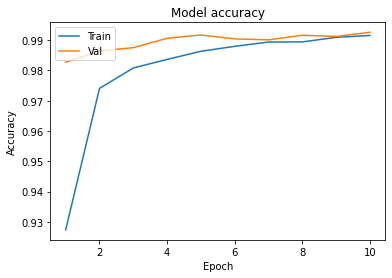

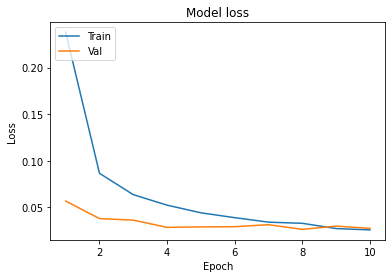

In [15]:
plot_learningCurve(history, 10)